In [69]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns 

import xgboost as xgb

from sklearn import datasets
from sklearn.model_selection import train_test_split

In [89]:
# Iris データセットを読み込む
iris = datasets.load_iris()
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1111)

params = {
        # 多値分類問題
        'objective': 'multiclass',
        # クラス数は 3
        'num_class': 3,
}

# 上記のパラメータでモデルを学習する
clf = xgb.XGBClassifier(**params)
    
clf.fit(X_train, y_train)
    
# テストデータを予測する
y_pred = clf.predict(X_test)

# 精度 (Accuracy) を計算する
from sklearn.metrics import accuracy_score
print(accuracy_score(y_pred,y_test))

0.9736842105263158


In [87]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [90]:
y_test_df = pd.DataFrame(y_test)
print(y_test_df[0].unique())

y_pred_df = pd.DataFrame(y_pred)
print(y_pred_df[0].unique())

[0 2 1]
[0 2 1]


Normalized confusion matrix
[[1.   0.   0.  ]
 [0.   0.94 0.06]
 [0.   0.   1.  ]]


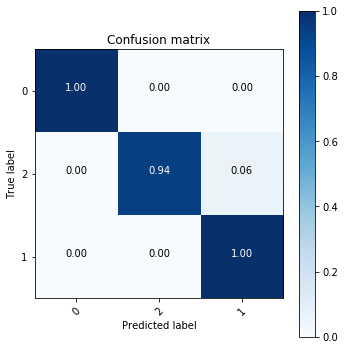

In [92]:
# http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test_df, y_pred_df)
np.set_printoptions(precision=2)

class_names = list(y_pred_df[0].unique())

# Plot non-normalized confusion matrix
plt.figure(figsize=(5,5))
foo = plot_confusion_matrix(cnf_matrix, classes=class_names,normalize=True,
                      title='Confusion matrix')